In [1]:
import pandas as pd

In [9]:
dia = pd.read_csv('https://raw.githubusercontent.com/CloudThat-HPE/ComprehensiveTrainingOnMLandDL/main/Datasets/diabetes.csv')

In [4]:
dia.head(20)

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0
5,1619297,0,82,92,9,253,19.724160,0.103424,26,0
6,1660149,0,133,47,19,227,21.941357,0.174160,21,0
7,1458769,0,67,87,43,36,18.277723,0.236165,26,0
8,1201647,8,80,95,33,24,26.624929,0.443947,53,1
9,1403912,1,72,31,40,42,36.889576,0.103944,26,0


In [5]:
dia.isnull().sum()

PatientID                 0
Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [10]:
dia.drop('PatientID', axis=1, inplace=True)

In [7]:
dia.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,0,171,80,34,23,43.509726,1.213191,21,0
1,8,92,93,47,36,21.240576,0.158365,23,0
2,7,115,47,52,35,41.511523,0.079019,23,0
3,9,103,78,25,304,29.582192,1.282870,43,1
4,1,85,59,27,35,42.604536,0.549542,22,0


In [11]:
X = dia.drop('Diabetic', axis=1)
y = dia['Diabetic']

In [12]:
X.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0,171,80,34,23,43.509726,1.213191,21
1,8,92,93,47,36,21.240576,0.158365,23
2,7,115,47,52,35,41.511523,0.079019,23
3,9,103,78,25,304,29.582192,1.282870,43
4,1,85,59,27,35,42.604536,0.549542,22


In [13]:
y.head()

0    0
1    0
2    0
3    1
4    0
Name: Diabetic, dtype: int64

In [14]:
from sklearn.preprocessing import MinMaxScaler


In [15]:
for col in X:
    mm = MinMaxScaler()
    X[col] = mm.fit_transform(X[[col]])

In [16]:
X.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
0,0.000000,0.858108,0.602151,0.313953,0.011465,0.668952,0.510511,0.000000
1,0.571429,0.324324,0.741935,0.465116,0.028025,0.080352,0.036123,0.035714
2,0.500000,0.479730,0.247312,0.523256,0.026752,0.616137,0.000438,0.035714
3,0.642857,0.398649,0.580645,0.209302,0.369427,0.300831,0.541848,0.392857
4,0.071429,0.277027,0.376344,0.232558,0.026752,0.645027,0.212047,0.017857


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=123)

In [18]:
from sklearn.linear_model import LogisticRegression
lgmodel = LogisticRegression()
lgmodel.fit(X_train,y_train)

LogisticRegression()

In [19]:
y_pred = lgmodel.predict(X_test)

In [20]:
y_pred

array([0, 0, 1, ..., 0, 0, 0])

In [21]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, plot_roc_curve

In [22]:
confusion_matrix(y_test, y_pred)

array([[2620,  382],
       [ 615,  883]])

In [23]:
accuracy_score(y_test, y_pred)

0.7784444444444445

In [24]:
precision_score(y_test, y_pred)

0.6980237154150197

In [25]:
recall_score(y_test, y_pred)

0.589452603471295

/home/ubuntu/my_ML_Projects/ml_project_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


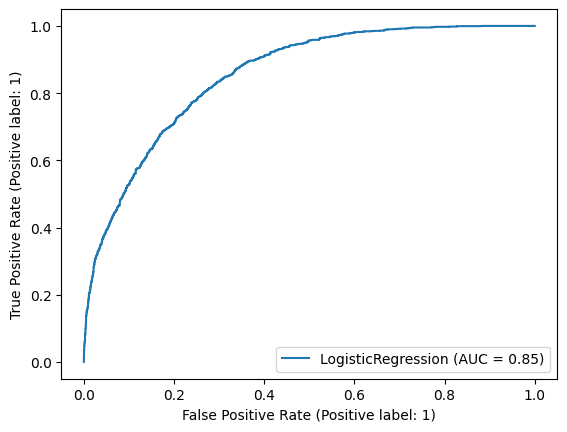

In [26]:
plot_roc_curve(lgmodel, X_test, y_test)

In [27]:
from sklearn.tree import DecisionTreeClassifier
dtmodel = DecisionTreeClassifier()
dtmodel.fit(X_train, y_train)

DecisionTreeClassifier()

In [28]:
y_predt = dtmodel.predict(X_test)

In [29]:
y_predt

array([1, 0, 0, ..., 0, 0, 0])

In [30]:
accuracy_score(y_test, y_predt)

0.894

In [31]:
precision_score(y_test, y_predt)

0.8378557246856386

In [32]:
recall_score(y_test, y_predt)

0.8451268357810414

/home/ubuntu/my_ML_Projects/ml_project_env/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


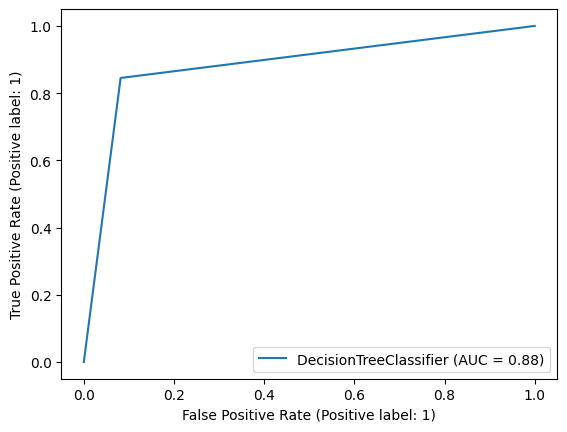

In [33]:
plot_roc_curve(dtmodel, X_test, y_test)

In [34]:
X_train.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age
5242,0.357143,0.371622,0.440860,0.267442,0.094268,0.475776,0.727108,0.303571
12675,0.142857,0.527027,0.860215,0.441860,0.024204,0.014693,0.002856,0.053571
6924,0.071429,0.290541,0.279570,0.313953,0.035669,0.015235,0.385402,0.017857
12596,0.642857,0.317568,0.215054,0.255814,0.198726,0.370881,0.037186,0.446429
12569,0.071429,0.716216,0.397849,0.395349,0.045860,0.377402,0.023832,0.017857


Regression

In [35]:
Xr = X_train.drop('Age', axis=1)
yr = X_train['Age']

In [36]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr,yr, test_size=0.3, random_state=123)

In [37]:
from sklearn.linear_model import LinearRegression


In [38]:
linmodel = LinearRegression()
linmodel.fit(Xr_train, yr_train)

LinearRegression()

In [43]:
yr_pred = linmodel.predict(Xr_test)

In [44]:
yr_pred

array([0.15486688, 0.20351492, 0.10040668, ..., 0.18525434, 0.14601018,
       0.22867955])

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [45]:
mean_squared_error(yr_test, yr_pred)

0.04549656633051055

In [46]:
mean_absolute_error(yr_test, yr_pred)

0.16733451226618656

In [47]:
r2_score(yr_test, yr_pred)

0.03667096325343244

## Clustering

In [72]:
seeds = pd.read_csv('https://raw.githubusercontent.com/CloudThat-HPE/ComprehensiveTrainingOnMLandDL/main/Datasets/seeds.csv')

In [73]:
seeds.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length,species
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,0
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,0
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,0
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,0
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,0


In [74]:
labels = seeds['species'] 

In [75]:
seeds.drop('species', axis=1, inplace=True)

In [76]:
X_train, X_test,y_train,y_test = train_test_split(seeds, labels, test_size=0.3)

In [67]:
seeds.head()

,area,perimeter,compactness,kernel_length,kernel_width,asymmetry_coefficient,groove_length
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175


In [69]:
X_train, X_test = train_test_split(seeds, test_size=0.3)

In [77]:
from sklearn.cluster import KMeans


In [78]:
kmn = KMeans(n_clusters = 3)

In [79]:
kmn.fit(X_train)

KMeans(n_clusters=3)

In [80]:
Pred = kmn.predict(X_test)

In [81]:
Pred

array([2, 1, 1, 1, 0, 1, 0, 2, 2, 2, 0, 1, 2, 2, 2, 1, 2, 0, 0, 0, 2, 2,
       2, 2, 0, 2, 0, 1, 0, 1, 1, 2, 2, 0, 2, 0, 0, 0, 2, 0, 0, 1, 0, 0,
       2, 1, 2, 2, 1, 2, 1, 2, 2, 1, 1, 2, 1, 2, 1, 1, 0, 1, 2],
      dtype=int32)

In [82]:
from sklearn.metrics import silhouette_score, rand_score, adjusted_rand_score

In [83]:
silhouette_score(X_test, Pred)

0.4447759232147429

In [84]:
rand_score(y_test, Pred)

0.8402457757296466

In [85]:
adjusted_rand_score(y_test, Pred)

0.6374730634542319